<a href="https://colab.research.google.com/github/gdtan02/MLACWorkshop/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

How we load the dataset Cifar10 and put it in 2 variables. (x_train, y_train) and (x_test, y_test)

In [ ]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

Now we try to see the number of images we have in the data set for both training set and test set.

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

We see here that we have 50000 images for the training set and 10000 images for the test set.

Now we also try to see how many we have in the y set for train and test

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

We have the same number of images but the images are supposed to be stored in an array. 

We try to see the array for y now.

We take the first 5 indexes only for now

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Here y_tarin[:5] means that it takes the index from 0 to 5 only.

We can also see that the array is a 2 dimension array but for classification we need only 1 dimension array.

So we first convert the 2D array to 1D using reshape method.

In [ ]:
y_train = y_train.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Now we set the classes. There are 10 kinds of images in the dataset, they are "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck".

So we store them in the classes variable and try to see if the classes display as expected.

In [ ]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[0]

'airplane'

In [ ]:
classes[9]

'truck'

So now we try to show an image with its lable with matplotlib function imshow.

We also try to see with a relatively small sized image.

In [ ]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2)) # for small size of the image.
    plt.imshow(x[index]) # for the image which we are giving in the parameter.
    plt.xlabel(classes[y[index]]) # for the lable of the image.

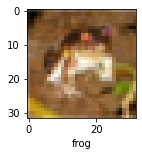

In [ ]:
plot_sample(x_train, y_train,0)

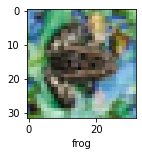

In [ ]:
plot_sample(x_train, y_train,200)

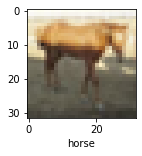

In [ ]:
plot_sample(x_train, y_train,2000)

As we can see that the images of train sample are displaying with the correct lable they have.

So now we try to normalize to a 0 to 1 range.

Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0 --> 1 range, we need to divide it by 255

In [ ]:
x_train = x_train/255
x_test = x_test/255

Build simple artificial neural network for image classification

[0,
0,
0,
0,
0,
0,
1,
0]

ship

[8]

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # simple flatten layer which accepts 32X32X3 matrix
        layers.Dense(3000, activation='relu'), # 1 deep layer with 3000 neurons
        layers.Dense(1000, activation='relu'), # 1 deep layer with 1000 neurons
        layers.Dense(10, activation='softmax') # 1 layer for the 10 categories we have   
    ])
# train ann with these dense layers with 3 parameters optimizer, loss and metrics
ann.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.8177 - accuracy: 0.3515
Epoch 2/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.6248 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5428 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4831 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4330 - accuracy: 0.4956


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

 46/313 [===>..........................] - ETA: 4s

We can see that we only have **48%** of accuracy with artificial neural network.



Now let us build a **convolutional neural network** to train our images

In [ ]:
cnn = models.Sequential([
    # first convolution and relu and maxpooling
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # second convolution and relu and maxpooling
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Now we compile specify optimizer, loss and metrics

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Before we train we see what is percentage of accuracy for lower epochs

In [ ]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
 739/1563 [=============>................] - ETA: 23s - loss: 0.3376 - accuracy: 0.8793

KeyboardInterrupt: ignored

For 5 epochs we get an accuracy just over **70%**. So now we try for greater accuracy.

I will try will 20 epochs.

In [ ]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4761 - accuracy: 0.4699
Epoch 2/20
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1233 - accuracy: 0.6028
Epoch 3/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9935 - accuracy: 0.6536
Epoch 4/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9130 - accuracy: 0.6813
Epoch 5/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8477 - accuracy: 0.7054
Epoch 6/20
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7944 - accuracy: 0.7252
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7453 - accuracy: 0.7410
Epoch 8/20
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7034 - accuracy: 0.7548
Epoch 9/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6642 - accuracy: 0.7687
Epoch 10/20
1563/1563 [==============================] - 47s 30m

# With CNN, at the end 20 epochs,
# accuracy was at around 92% which is a significant improvement over ANN.
# CNN's are best for image classification and gives superb accuracy.
# Also computation is much less compared to simple ANN as maxpooling 
# reduces the image dimensions while still preserving the features

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[3.3436423e-05, 6.9989552e-12, 7.4354204e-05, 9.9969542e-01,
        5.4401626e-06, 1.8554926e-04, 5.2628693e-06, 6.2497134e-07,
        1.0260154e-08, 4.3996028e-08],
       [6.2113109e-08, 3.6029209e-04, 1.8073536e-15, 5.5505994e-14,
        2.2333134e-18, 1.7085076e-14, 8.4182824e-18, 3.2662989e-21,
        9.9963963e-01, 9.1506719e-11],
       [1.2068564e-02, 8.2968777e-01, 6.0685654e-04, 3.6153832e-04,
        2.5664523e-04, 2.5537262e-05, 8.2693347e-10, 2.3245123e-04,
        1.5664408e-01, 1.1656334e-04],
       [9.5649993e-01, 7.1962951e-09, 4.9884948e-05, 1.3134795e-05,
        5.7392917e-05, 1.0900618e-07, 4.4379458e-11, 7.9662515e-10,
        4.3379545e-02, 4.2992376e-08],
       [1.3675869e-11, 2.7678981e-10, 4.2391031e-05, 1.4365608e-03,
        2.6958877e-01, 4.7550488e-06, 7.2892749e-01, 3.3143866e-08,
        2.3336830e-09, 1.9302763e-12]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

Now we reshape the y again and test

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

We now test with the plot_sample function to see if we can get the correct answer or not|

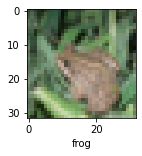

In [ ]:
plot_sample(x_test, y_test,4)

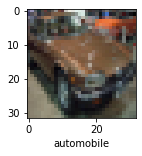

In [ ]:
plot_sample(x_test, y_test,2000)

Now we actually put our CNN to test

In [ ]:
classes[y_classes[4]]

'frog'

In [ ]:
classes[y_classes[2000]]

'automobile'